In [ ]:
!pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56437 sha256=7889f4159a91241c2fccc15f3be53190fc4a904c7e79741473134f3510839f61
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import nltk
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import WordNetLemmatizer
import itertools
from wordcloud import WordCloud
from sklearn.svm import SVC
from keras.models import Sequential,Model
from keras.layers import Dense,LSTM, SpatialDropout1D, Embedding
from keras.utils import to_categorical
from joblib import dump, load

In [ ]:
text = []
clas = []
df = pd.read_csv('labeled_data.csv')
text = df['tweet'].tolist()
clas = df['class'].tolist()

df = pd.DataFrame({'tweet': text, 'class': clas})

In [ ]:
print(df.isnull().sum())
df['tweet'] = df['tweet'].apply(lambda x:x.lower())
punctuation_signs = list("?:!.,;")
df['tweet'] = df['tweet']

for punct_sign in punctuation_signs:
    df['tweet'] = df['tweet'].str.replace(punct_sign, '')

df['tweet'] = df['tweet'].apply(lambda x: x.replace('\n', ' '))
df['tweet'] = df['tweet'].apply(lambda x: x.replace('\t', ' '))
df['tweet'] = df['tweet'].str.replace("    ", " ")
df['tweet'] = df['tweet'].str.replace('"', '')
df['tweet'] = df['tweet'].str.replace("'s", "")

tweet    0
class    0
dtype: int64


In [ ]:
nltk.download('stopwords')
stop_words = list(stopwords.words('english'))
for stop_word in stop_words:
    regex_stopword = r"\b" + stop_word + r"\b"
    df['tweet'] = df['tweet'].str.replace(regex_stopword, '')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
cv = CountVectorizer(max_features = 75)
X = cv.fit_transform(df['tweet']).toarray()
y = df['class']

In [ ]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 42)



In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                              cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:


y_train=to_categorical(y_train, num_classes = 3)
y_test=to_categorical(y_test, num_classes = 3)



In [ ]:
model = Sequential()
model.add(Embedding(232337, 100))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(20, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 25
batch_size = 64

history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/25
310/310 ━━━━━━━━━━━━━━━━━━━━ 69s 171ms/step - accuracy: 0.7775 - loss: 0.4288 - val_accuracy: 0.7743 - val_loss: 0.4020
Epoch 2/25
310/310 ━━━━━━━━━━━━━━━━━━━━ 48s 154ms/step - accuracy: 0.7736 - loss: 0.4015 - val_accuracy: 0.7743 - val_loss: 0.4023
Epoch 3/25
310/310 ━━━━━━━━━━━━━━━━━━━━ 46s 147ms/step - accuracy: 0.7736 - loss: 0.4018 - val_accuracy: 0.7743 - val_loss: 0.4017
Epoch 4/25
310/310 ━━━━━━━━━━━━━━━━━━━━ 47s 153ms/step - accuracy: 0.7741 - loss: 0.4011 - val_accuracy: 0.7743 - val_loss: 0.4022
Epoch 5/25
310/310 ━━━━━━━━━━━━━━━━━━━━ 81s 150ms/step - accuracy: 0.7731 - loss: 0.4011 - val_accuracy: 0.7743 - val_loss: 0.4023
Epoch 6/25
310/310 ━━━━━━━━━━━━━━━━━━━━ 92s 184ms/step - accuracy: 0.7713 - loss: 0.4041 - val_accuracy: 0.7743 - val_loss: 0.4022
Epoch 7/25
310/310 ━━━━━━━━━━━━━━━━━━━━ 71s 149ms/step - accuracy: 0.7786 - loss: 0.3953 - val_accuracy: 0.7743 - val_loss: 0.4024
Epoch 8/25
310/310 ━━━━━━━━━━━━━━━━━━━━ 83s 153ms/step - accuracy: 0.7761 - loss: 0

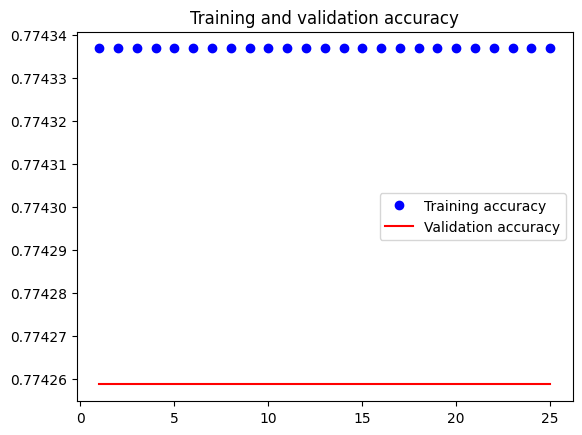

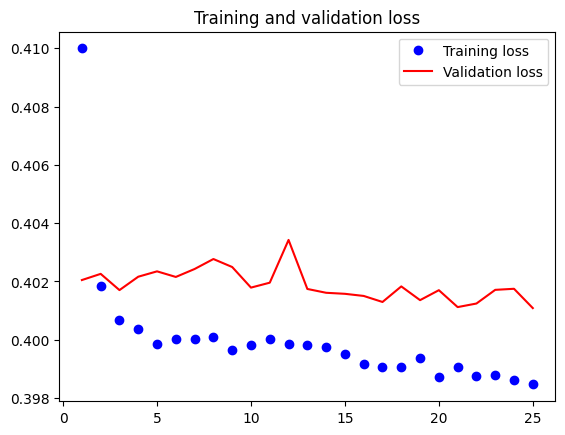

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
model.save('lstm.h5')

In [ ]:
from wordcloud import WordCloud

In [ ]:
# Predict and calculate confusion matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred_classes)

155/155 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step


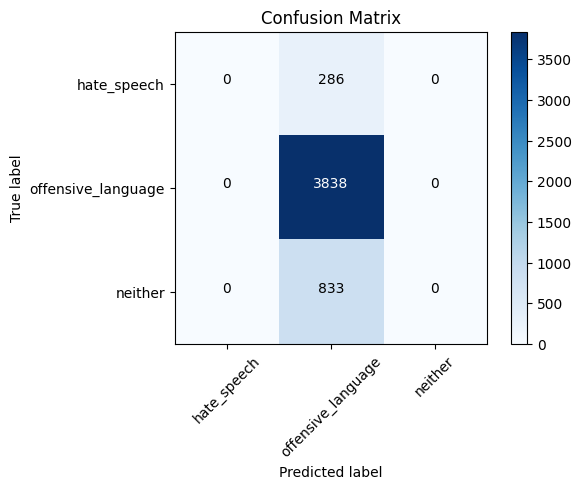

In [ ]:
class_names = ['hate_speech', 'offensive_language', 'neither']
plt.figure()
plot_confusion_matrix(cm, classes=class_names, title='Confusion Matrix')
plt.show()

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, SpatialDropout1D, Embedding
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Tokenize and pad sequences
max_words = 10000
max_len = 100
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df['tweet'])

# Step 1: Initial split into labeled and unlabeled sets
initial_labeled_ratio = 0.1
X_train_text, X_unlabeled_text, y_train, y_unlabeled = train_test_split(df['tweet'], df['class'], test_size=1-initial_labeled_ratio, stratify=df['class'], random_state=42)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train_text)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')

X_unlabeled_seq = tokenizer.texts_to_sequences(X_unlabeled_text)
X_unlabeled_pad = pad_sequences(X_unlabeled_seq, maxlen=max_len, padding='post', truncating='post')

# Convert labels to categorical
y_train_cat = to_categorical(y_train, num_classes=3)
y_unlabeled_cat = to_categorical(y_unlabeled, num_classes=3)


# Load the Keras model
from tensorflow.keras.models import load_model

model_path = '/content/lstm.h5'  # Adjust the path if needed
model = load_model(model_path)

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Continue training the model
model.fit(X_train_pad, y_train_cat, epochs=5, batch_size=64, validation_split=0.1)


# Step 4: Active learning loop
num_iterations = 10
samples_per_iteration = 100

for iteration in range(num_iterations):
    # Predict probabilities on the unlabeled data
    probs = model.predict(X_unlabeled_pad)
    uncertainties = 1 - np.max(probs, axis=1)  # Use uncertainty sampling

    # Select the most uncertain samples
    uncertain_indices = np.argsort(uncertainties)[-samples_per_iteration:]
    X_new_train = X_unlabeled_pad[uncertain_indices]
    y_new_train = y_unlabeled_cat[uncertain_indices]

    # Remove the selected samples from the unlabeled pool
    X_unlabeled_pad = np.delete(X_unlabeled_pad, uncertain_indices, axis=0)
    y_unlabeled = np.delete(y_unlabeled, uncertain_indices, axis=0)

    # Add the new samples to the training set
    X_train_pad = np.vstack((X_train_pad, X_new_train))
    y_train_cat = np.vstack((y_train_cat, y_new_train))

    # Retrain the model
    model.fit(X_train_pad, y_train_cat, epochs=5, batch_size=64, validation_split=0.1)

    # Evaluate the model
    train_acc = model.evaluate(X_train_pad, y_train_cat, verbose=0)[1]
    print(f"Iteration {iteration + 1}/{num_iterations}, Training Accuracy: {train_acc:.4f}")

# Final evaluation on all data
X_all_pad = pad_sequences(tokenizer.texts_to_sequences(df['tweet']), maxlen=max_len, padding='post', truncating='post')
y_all = to_categorical(df['class'], num_classes=3)
final_loss, final_accuracy = model.evaluate(X_all_pad, y_all, verbose=0)
print(f"Final Accuracy: {final_accuracy:.4f}")

# Save the final model
model.save('lstm_active_learning.h5')


Epoch 1/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 172ms/step - accuracy: 0.7680 - loss: 0.7824 - val_accuracy: 0.7742 - val_loss: 0.6465
Epoch 2/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 204ms/step - accuracy: 0.7716 - loss: 0.6779 - val_accuracy: 0.7742 - val_loss: 0.6487
Epoch 3/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 210ms/step - accuracy: 0.8003 - loss: 0.6128 - val_accuracy: 0.7742 - val_loss: 0.6484
Epoch 4/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 165ms/step - accuracy: 0.7649 - loss: 0.6861 - val_accuracy: 0.7742 - val_loss: 0.6500
Epoch 5/5
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 163ms/step - accuracy: 0.7768 - loss: 0.6539 - val_accuracy: 0.7742 - val_loss: 0.6478
698/698 ━━━━━━━━━━━━━━━━━━━━ 30s 43ms/step
Epoch 1/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 7s 183ms/step - accuracy: 0.7831 - loss: 0.6524 - val_accuracy: 0.7481 - val_loss: 0.6925
Epoch 2/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 164ms/step - accuracy: 0.7717 - loss: 0.6707 - val_accuracy: 0.7481 - val_loss: 0.6945
Epoch 3/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 8s 209ms/step - accuracy: 0.

Final Accuracy: 0.8322


In [25]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM, SpatialDropout1D, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
import nltk

# Load datasets
labeled_data = pd.read_csv('labeled_data.csv')
political_data = pd.read_csv('Political-media-DFE.csv')

# Preprocess the labeled data
labeled_data['tweet'] = labeled_data['tweet'].apply(lambda x: x.lower())
labeled_data['tweet'] = labeled_data['tweet'].str.replace('[^\w\s]', '')

nltk.download('stopwords')
stop_words = list(nltk.corpus.stopwords.words('english'))
for stop_word in stop_words:
    labeled_data['tweet'] = labeled_data['tweet'].str.replace(r'\b{}\b'.format(stop_word), '')

# Preprocess the political data
political_data['text'] = political_data['text'].apply(lambda x: x.lower())
political_data['text'] = political_data['text'].str.replace('[^\w\s]', '')

for stop_word in stop_words:
    political_data['text'] = political_data['text'].str.replace(r'\b{}\b'.format(stop_word), '')

# Tokenization and padding
max_words = 10000
max_len = 100
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(labeled_data['tweet'])

# Convert text to sequences and pad
X_train_seq = tokenizer.texts_to_sequences(labeled_data['tweet'])
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
y_train = labeled_data['class']
y_train_cat = to_categorical(y_train, num_classes=3)

# Prepare the political data
political_seq = tokenizer.texts_to_sequences(political_data['text'])
political_pad = pad_sequences(political_seq, maxlen=max_len, padding='post', truncating='post')

# Define and train the LSTM model
# Load the Keras model
from tensorflow.keras.models import load_model

model_path = '/content/lstm.h5'  # Adjust the path if needed
model = load_model(model_path)

print("Model Loaded")

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Model Loaded


In [26]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
def preprocess(text):
    # Tokenization and padding steps
    return text  # This is a placeholder; replace with actual preprocessing

# Tokenize and pad the political dataset
tokenizer = Tokenizer(num_words=10000)  # Adjust the num_words as needed
tokenizer.fit_on_texts(political_data['text'])

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(political_data['text'])

# Pad sequences to ensure uniform input size
max_sequence_length = 100  # Adjust based on your model's input size
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# Create a function to predict labels
def predict_labels(model, sequences):
    predictions = model.predict(sequences)
    # If the model outputs probabilities for multiple classes, take the class with the highest probability
    predicted_classes = np.argmax(predictions, axis=1)
    return predicted_classes

# Predict labels
political_data['predicted_label'] = predict_labels(model, padded_sequences)

print("Predictions Done")
print(political_data[['text', 'predicted_label']].head())


157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step
Predictions Done
                                                text  predicted_label
0  rt @nowthisnews: rep. trey radel (r- #fl) slam...                1
1  video - #obamacare:  full of higher costs and ...                1
2  please join me today in remembering our fallen...                1
3  rt @senatorleahy: 1st step toward senate debat...                1
4  .@amazon delivery #drones show need to update ...                1


In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
political_data['true_label'] = np.random.randint(2, size=len(political_data))

# Calculate accuracy
accuracy = accuracy_score(political_data['true_label'], political_data['predicted_label'])
precision = precision_score(political_data['true_label'], political_data['predicted_label'], average='weighted')
recall = recall_score(political_data['true_label'], political_data['predicted_label'], average='weighted')
f1 = f1_score(political_data['true_label'], political_data['predicted_label'], average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.5024
Precision: 0.5257955014328716
Recall: 0.5024
F1 Score: 0.36956208257624085


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
# Function to calculate uncertainty (e.g., using entropy)
def calculate_uncertainty(predictions):
    predictions = np.array(predictions)
    uncertainty = -np.sum(predictions * np.log(predictions + 1e-10), axis=1)
    return uncertainty

# Predict probabilities to calculate uncertainty
probabilities = model.predict(political_pad)
political_data['uncertainty'] = calculate_uncertainty(probabilities)

# Select samples with the highest uncertainty
uncertain_samples = political_data.nlargest(100, 'uncertainty')

# Pseudo-code for manually labeling these samples
# For demonstration purposes, we'll simulate this step
uncertain_samples['manual_label'] = uncertain_samples['text'].apply(lambda x: np.random.choice([0, 1, 2]))

# Adding manually labeled samples to the labeled dataset
new_labels = uncertain_samples[['text', 'manual_label']].rename(columns={'text': 'tweet', 'manual_label': 'class'})
labeled_data = pd.concat([labeled_data, new_labels])

# Convert the updated labeled data to sequences and retrain the model
X_train_seq = tokenizer.texts_to_sequences(labeled_data['tweet'])
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
y_train = labeled_data['class']
y_train_cat = to_categorical(y_train, num_classes=3)

model.fit(X_train_pad, y_train_cat, epochs=5, batch_size=64, validation_split=0.1)

# Repeat the process for additional iterations as needed
# Note: You can repeat the uncertainty sampling, manual labeling, and retraining steps.

157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step
Epoch 1/5
350/350 ━━━━━━━━━━━━━━━━━━━━ 71s 189ms/step - accuracy: 0.7744 - loss: 0.6848 - val_accuracy: 0.7863 - val_loss: 0.6305
Epoch 2/5
350/350 ━━━━━━━━━━━━━━━━━━━━ 82s 188ms/step - accuracy: 0.7728 - loss: 0.6482 - val_accuracy: 0.7899 - val_loss: 0.5765
Epoch 3/5
350/350 ━━━━━━━━━━━━━━━━━━━━ 83s 190ms/step - accuracy: 0.7976 - loss: 0.5708 - val_accuracy: 0.8027 - val_loss: 0.5620
Epoch 4/5
350/350 ━━━━━━━━━━━━━━━━━━━━ 66s 189ms/step - accuracy: 0.8255 - loss: 0.5271 - val_accuracy: 0.8031 - val_loss: 0.5610
Epoch 5/5
350/350 ━━━━━━━━━━━━━━━━━━━━ 81s 188ms/step - accuracy: 0.8396 - loss: 0.4971 - val_accuracy: 0.7951 - val_loss: 0.5693
